CODE FOR TASK A

Import necessary libraries & functions for Task A

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import joblib
import shutil

import skimage
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import accuracy_score

print("Step Complete")

Step Complete


Tumour Image Initial Preprocessing

In [2]:
def no_formatting_needed():
    #use this function if pickle file for sorted training dataset TaskA already exists
    #Initialising Parameters for future steps
    base_name = 'TaskA_training_dataset'
    width = 256
    include = {'no_tumour', 'tumour'}
    
def no_formatting_needed_testset():
    #use this function if pickle file for sorted test dataset TaskA already exists
    #Initialising Parameters for future steps
    base_name = 'TaskA_test_dataset'
    width = 256
    include = {'no_tumour', 'tumour'}
    print("Step Complete")

In [3]:
def formatting_needed():
    #use this function if pickle file for sorted trainig dataset TaskA does not exist (i.e first time of running the code)
    
    #Function to preprocess the tumour images (grayscale, resize, convert to array and storing in pickle file)
    def format_img(src, pklname, include, width=150, height=None):
        """
        function to load images from source, convert to grayscale, resize them and 
        write them as arrays to a dictionary with their respective labels. 
        The dictionary is written to a pickle file.
     
        Parameter
        ---------
        src: str
            path to data
        pklname: str
            path to output file
        width: int
            target width of the image in pixels
        include: set[str]
            set containing str
        """
     
        height = height if height is not None else width
     
        data = dict()
        data['label'] = []
        data['filename'] = []
        data['data'] = []   
     
        pklname = f"{pklname}_{width}x{height}px.pkl"
 
        # read all images in PATH, convert to greyscale, resize and write to destination
        for subdir in os.listdir(src):
            if subdir in include:
                print(subdir)
                current_path = os.path.join(src, subdir)
 
                for file in os.listdir(current_path):
                    if file[-3:] in {'jpg', 'png'}:
                        im = imread(os.path.join(current_path, file), as_gray=True) 
                        im = resize(im, (width, height)) 
                        data['label'].append(subdir[:-4])
                        data['filename'].append(file)
                        data['data'].append(im)
 
            joblib.dump(data, pklname)
    
    #Sorting the images to two folders; no tumour and tumour
    #Import label.csv file
    data = pd.read_csv('./dataset./label.csv')
    #print(data) #debug line

    #Give the image labels binary values based on tumour (1) or no tumour (0)
    data.label[data.label == 'no_tumor'] = 0
    data.label[data.label == 'meningioma_tumor'] = 1
    data.label[data.label == 'glioma_tumor'] = 1
    data.label[data.label == 'pituitary_tumor'] = 1
    #print(data.dtypes) #debug line

    #Convert the label data type to integer
    data['label'] = data['label'].astype(str).astype(int)
    #print(data.dtypes) #debug line
    #print(data) #debug line

    #Create two arrays which contain the respective image names  
    no_tumour = []
    tumour = []

    for i in range(data.shape[0]):
        if data['label'][i] == 0:
            no_tumour.append(data['file_name'][i])
        else:
            tumour.append(data['file_name'][i])

    #print(len(tumour)) #debug line
    #print(len(no_tumour)) #debug line

    #Create a sorted subfolder to store the sorted images
    os.mkdir(os.path.join("./dataset./image", "TaskA_sortedtrainingdataset"))

    #Create two subfolders in sorted folder
    os.mkdir(os.path.join("./dataset./image/TaskA_sortedtrainingdataset", "no_tumour"))
    os.mkdir(os.path.join("./dataset./image/TaskA_sortedtrainingdataset", "tumour"))

    #Copy the images into the respective subfolders
    src_dir = "./dataset./image"
    dst_dir1 = os.path.join("./dataset./image/TaskA_sortedtrainingdataset", "no_tumour")
    dst_dir2 = os.path.join("./dataset./image/TaskA_sortedtrainingdataset", "tumour")
    data_path = "./dataset./image/TaskA_sortedtrainingdataset"

    for imageName in no_tumour:
        shutil.copy(os.path.join(src_dir, imageName), dst_dir1)

    for imageName in tumour:
        shutil.copy(os.path.join(src_dir, imageName), dst_dir2)

    #os.listdir(data_path)  #debug line

    #Initialising Parameters for resize function
    base_name = 'TaskA_training_dataset'
    width = 256
    include = {'no_tumour', 'tumour'}
 
    #Create pkl file with resized images resized and converted to arrays
    format_img(src=data_path, pklname=base_name, width=width, include=include)
    print("Step Complete: Training dataset formatted")

In [4]:
def formatting_needed_testset():
    #use this function if pickle file for sorted test dataset TaskA does not exist (i.e first time of running the code)
    
    #Function to preprocess the tumour images (grayscale, resize, convert to array and storing in pickle file)
    def format_img_test(src, pklname, include, width=150, height=None):
        """
        function to load images from source, convert to grayscale, resize them and 
        write them as arrays to a dictionary with their respective labels. 
        The dictionary is written to a pickle file.
     
        Parameter
        ---------
        src: str
            path to data
        pklname: str
            path to output file
        width: int
            target width of the image in pixels
        include: set[str]
            set containing str
        """
     
        height = height if height is not None else width
     
        data = dict()
        data['label'] = []
        data['filename'] = []
        data['data'] = []   
     
        pklname = f"{pklname}_{width}x{height}px.pkl"
 
        # read all images in PATH, convert to greyscale, resize and write to destination
        for subdir in os.listdir(src):
            if subdir in include:
                print(subdir)
                current_path = os.path.join(src, subdir)
 
                for file in os.listdir(current_path):
                    if file[-3:] in {'jpg', 'png'}:
                        im = imread(os.path.join(current_path, file), as_gray=True) 
                        im = resize(im, (width, height)) 
                        data['label'].append(subdir[:-4])
                        data['filename'].append(file)
                        data['data'].append(im)
 
            joblib.dump(data, pklname)
    
    #Sorting the images to two folders; no tumour and tumour
    #Import label.csv file
    data = pd.read_csv('./test./label.csv')
    #print(data) #debug line

    #Give the image labels binary values based on tumour (1) or no tumour (0)
    data.label[data.label == 'no_tumor'] = 0
    data.label[data.label == 'meningioma_tumor'] = 1
    data.label[data.label == 'glioma_tumor'] = 1
    data.label[data.label == 'pituitary_tumor'] = 1
    #print(data.dtypes) #debug line

    #Convert the label data type to integer
    data['label'] = data['label'].astype(str).astype(int)
    #print(data.dtypes) #debug line
    #print(data) #debug line

    #Create two arrays which contain the respective image names  
    no_tumour = []
    tumour = []

    for i in range(data.shape[0]):
        if data['label'][i] == 0:
            no_tumour.append(data['file_name'][i])
        else:
            tumour.append(data['file_name'][i])

    #print(len(tumour)) #debug line
    #print(len(no_tumour)) #debug line

    #Create a sorted subfolder to store the sorted images
    os.mkdir(os.path.join("./test./image", "TaskA_sortedtestdataset"))

    #Create two subfolders in sorted folder
    os.mkdir(os.path.join("./test./image/TaskA_sortedtestdataset", "no_tumour"))
    os.mkdir(os.path.join("./test./image/TaskA_sortedtestdataset", "tumour"))

    #Copy the images into the respective subfolders
    src_dir = "./test./image"
    dst_dir1 = os.path.join("./test./image/TaskA_sortedtestdataset", "no_tumour")
    dst_dir2 = os.path.join("./test./image/TaskA_sortedtestdataset", "tumour")
    data_path = "./test./image/TaskA_sortedtestdataset"

    for imageName in no_tumour:
        shutil.copy(os.path.join(src_dir, imageName), dst_dir1)

    for imageName in tumour:
        shutil.copy(os.path.join(src_dir, imageName), dst_dir2)

    #os.listdir(data_path)  #debug line

    #Initialising Parameters for resize function
    base_name = 'TaskA_test_dataset'
    width = 256
    include = {'no_tumour', 'tumour'}
 
    #Create pkl file with resized images resized and converted to arrays
    format_img_test(src=data_path, pklname=base_name, width=width, include=include)
    print("Step Complete: Test dataset formatted")

In [5]:
image_formatting=input("Does a pickle file containing the sorted training data exist?(Please enter N in captial if running code for first time and Y in capital for subsequent runs) ")

if image_formatting == "Y":
    no_formatting_needed()
    no_formatting_needed_testset()
elif image_formatting == "N":
    formatting_needed()
    formatting_needed_testset()
else:
    print("Incorrect input! Please run cell again and input either Y or N")

Does a pickle file containing the sorted training data exist?(Please enter N in captial if running code for first time and Y in capital for subsequent runs) N
no_tumour
tumour
Step Complete: Training dataset formatted
no_tumour
tumour
Step Complete: Test dataset formatted


Load the pickle file

In [6]:
#Initialising some parameters
base_name = 'TaskA_training_dataset'
width = 256
include = {'no_tumour', 'tumour'}

#Load pickle file
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')

#some information about the data
print('Training dataset')
print('number of samples: ', len(data['data']))
print('image resolution: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))

#Initialising some parameters
base_name = 'TaskA_test_dataset'
width = 256
include = {'no_tumour', 'tumour'}

#Load pickle file
data_test = joblib.load(f'{base_name}_{width}x{width}px.pkl')

#some information about the data
print('')
print('Test dataset')
print('number of samples: ', len(data_test['data']))
print('image resolution: ', data_test['data'][0].shape)
print('labels:', np.unique(data_test['label']))

print("Step Complete")

Training dataset
number of samples:  3000
image resolution:  (256, 256)
labels: ['no_tu' 'tu']
Test dataset
number of samples:  200
image resolution:  (256, 256)
labels: ['no_tu' 'tu']
Step Complete


Split the data to training and validation set

In [7]:
#Extract the X and y values from training data
X = np.array(data['data'])
y = np.array(data['label'])

#Split data to train and test (75% train, 25% split)
X_train, X_validate, y_train, y_validate = train_test_split(
    X, 
    y, 
    test_size=0.25, 
    shuffle=True,
    random_state=42,
)

#Extract the X and y values from the test data
X_test = np.array(data_test['data'])
y_test = np.array(data_test['label'])
print("Step Complete")

Step Complete


Define the HOG transformer class

In [8]:
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (greyscale or 1 channel images)
    Calculates hog features for each image
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

print("Step Complete")

Step Complete


Prepare training and validation data

In [9]:
# create an instance of HOG transformer and scaling transformer
hogify = HogTransformer(
    #change parameters below for optimisation
    pixels_per_cell=(10, 10), 
    cells_per_block=(2, 2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
X_train_hog = hogify.fit_transform(X_train)
X_train_prepared = scalify.fit_transform(X_train_hog)

#print(X_train.shape) #debug line
#print(X_train_prepared.shape) #debug line

#transform validation data
X_validate_hog = hogify.transform(X_validate)
X_validate_prepared = scalify.transform(X_validate_hog)

#print(X_validate_prepared.shape) #debug line

#transform test data
X_test_hog = hogify.transform(X_test)
X_test_prepared = scalify.transform(X_test_hog)
#print(X_test_prepared.shape) #debug line
print("Step Complete")

(200, 20736)
Step Complete


SVM with SGD optimisation

In [10]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3, verbose=1, learning_rate='optimal', alpha=0.0005)

#Fit the data
sgd_clf.fit(X_train_prepared, y_train)

#Validate the data
y_pred = sgd_clf.predict(X_validate_prepared)
#print(np.array(y_pred == y_validate)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_validate)/len(y_validate))
cmx = confusion_matrix(y_validate, y_pred, labels=["no_tu","tu"])
print(cmx)
print('')

#Run the classifier with test data
y_pred_test = sgd_clf.predict(X_test_prepared)
#print(np.array(y_pred_test == y_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred_test == y_test)/len(y_test))
cmx = confusion_matrix(y_test, y_pred_test, labels=["no_tu","tu"])
print(cmx)

-- Epoch 1
Norm: 1949.82, NNZs: 20736, Bias: 1449.088980, T: 2250, Avg. loss: 3477.441878
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1196.84, NNZs: 20736, Bias: 1645.958153, T: 4500, Avg. loss: 430.582401
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 847.91, NNZs: 20736, Bias: 1685.127947, T: 6750, Avg. loss: 60.666984
Total training time: 0.20 seconds.
-- Epoch 4
Norm: 656.22, NNZs: 20736, Bias: 1693.437445, T: 9000, Avg. loss: 9.975578
Total training time: 0.26 seconds.
-- Epoch 5
Norm: 530.13, NNZs: 20736, Bias: 1694.041626, T: 11250, Avg. loss: 1.095790
Total training time: 0.31 seconds.
-- Epoch 6
Norm: 446.69, NNZs: 20736, Bias: 1693.736454, T: 13500, Avg. loss: 0.429697
Total training time: 0.37 seconds.
-- Epoch 7
Norm: 388.27, NNZs: 20736, Bias: 1693.316661, T: 15750, Avg. loss: 0.489682
Total training time: 0.42 seconds.
-- Epoch 8
Norm: 341.38, NNZs: 20736, Bias: 1693.196592, T: 18000, Avg. loss: 0.021031
Total training time: 0.47 seconds.
-- Epoch 9
Norm: 312

K-Nearest Neighbours Classifier

For k = 1
Percentage correct:  95.73333333333333
confusion matrix is:
[[105  22]
 [ 10 613]]

For k = 2
Percentage correct:  95.73333333333333
confusion matrix is:
[[105  22]
 [ 10 613]]

For k = 3
Percentage correct:  95.2
confusion matrix is:
[[107  20]
 [ 16 607]]

For k = 4
Percentage correct:  94.93333333333334
confusion matrix is:
[[105  22]
 [ 16 607]]

For k = 5
Percentage correct:  94.53333333333333
confusion matrix is:
[[105  22]
 [ 19 604]]

For k = 6
Percentage correct:  94.93333333333334
confusion matrix is:
[[105  22]
 [ 16 607]]

For k = 7
Percentage correct:  94.53333333333333
confusion matrix is:
[[102  25]
 [ 16 607]]

For k = 8
Percentage correct:  94.8
confusion matrix is:
[[104  23]
 [ 16 607]]

For k = 9
Percentage correct:  94.4
confusion matrix is:
[[102  25]
 [ 17 606]]

For k = 10
Percentage correct:  94.66666666666667
confusion matrix is:
[[102  25]
 [ 15 608]]

For k = 11
Percentage correct:  94.66666666666667
confusion matrix is:
[[102  25]
 [ 15 608]]

For

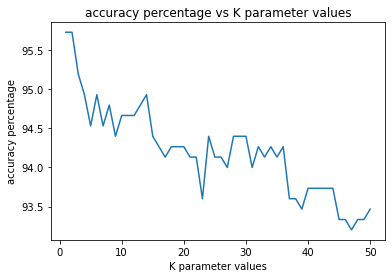

Running the classifier with test data
For k = 24
Percentage correct:  93.0
confusion matrix is:
[[ 28   9]
 [  5 158]]



In [12]:
def KNNClassifier(X_train, y_train, X_test,k):

    #Create KNN object
    neigh = KNeighborsClassifier(n_neighbors=k,weights='distance',p=2)
    neigh.fit(X_train, y_train) # Fit KNN model

    y_pred_knn = neigh.predict(X_test)
    return y_pred_knn

precentage = np.zeros(50)

#print(X_train_prepared.shape) #debug line
#print(X_validate_prepared.shape) #debug line

for i in range(1,51):
    y_pred_knn=KNNClassifier(X_train_prepared, y_train, X_validate_prepared,i)
    print('For k =', i)
    precentage[i-1]=100*np.sum(y_pred_knn == y_validate)/len(y_validate)
    print('Percentage correct: ', precentage[i-1])
    cmx_knn = confusion_matrix(y_validate, y_pred_knn, labels=["no_tu","tu"])
    print('confusion matrix is:')
    print(cmx_knn)
    print('')
    
#plot the accuracy of K
K_values = np.linspace(1, 50, num=50)
plt.plot(K_values,precentage)
plt.xlabel("K parameter values")
plt.ylabel("accuracy percentage")
plt.title("accuracy percentage vs K parameter values")
plt.show()

print('Running the classifier with test data')
y_pred_knn_test=KNNClassifier(X_train_prepared, y_train, X_test_prepared,24)
print('For k = 24')
print('Percentage correct: ', 100*np.sum(y_pred_knn_test == y_test)/len(y_test))
cmx_knn = confusion_matrix(y_test, y_pred_knn_test, labels=["no_tu","tu"])
print('confusion matrix is:')
print(cmx_knn)
print('')

Decision Trees classifier


Minimum samples for split: 2
Prediction accuracy (%):  91.73333333333333
10
[[ 93  34]
 [ 28 595]]


Minimum samples for split: 5
Prediction accuracy (%):  91.86666666666666
9
[[ 91  36]
 [ 25 598]]


Minimum samples for split: 10
Prediction accuracy (%):  90.26666666666667
9
[[ 90  37]
 [ 36 587]]


Minimum samples for split: 15
Prediction accuracy (%):  90.8
9
[[ 92  35]
 [ 34 589]]


Minimum samples for split: 20
Prediction accuracy (%):  91.33333333333333
9
[[ 92  35]
 [ 30 593]]


Minimum samples for split: 25
Prediction accuracy (%):  90.4
9
[[ 92  35]
 [ 37 586]]


Minimum samples for split: 30
Prediction accuracy (%):  91.6
9
[[ 91  36]
 [ 27 596]]


Minimum samples for split: 35
Prediction accuracy (%):  91.73333333333333
9
[[ 92  35]
 [ 27 596]]


Minimum samples for split: 40
Prediction accuracy (%):  90.66666666666667
9
[[ 90  37]
 [ 33 590]]


Minimum samples for split: 45
Prediction accuracy (%):  90.4
8
[[ 82  45]
 [ 27 596]]


Minimum samples for split: 50
Prediction a

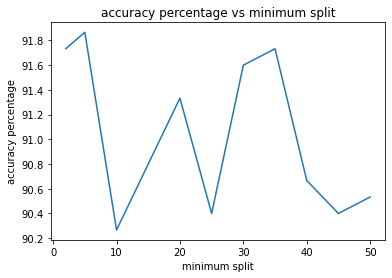

Running the classifier with test data

Minimum samples for split: 2
Prediction accuracy (%):  95.0
10
[[ 33   4]
 [  6 157]]



In [13]:
split_params = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

accuracy_tree = np.zeros(11)
index = 0

for i in split_params:
    tree_params={
        'criterion': 'entropy',
        'min_samples_split':i
    }
    clf_tree = tree.DecisionTreeClassifier(**tree_params)
    clf_tree.fit(X_train_prepared, y_train)
    
    #print(X_train_prepared.shape) #debug line
    #print(X_validate_prepared.shape) #debug line
    #print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf_tree.predict(X_train_prepared)))
    #print('Accuracy Score on test data: ', accuracy_score(y_true=y_validate, y_pred=clf_tree.predict(X_validate_prepared)))

    y_pred_tree = clf_tree.predict(X_validate_prepared)
    #print(np.array(y_pred_tree == y_validate)[:25])
    print('')
    print("Minimum samples for split:", i)
    accuracy_tree[index]=100*np.sum(y_pred_tree == y_validate)/len(y_validate)
    print('Prediction accuracy (%): ', accuracy_tree[index])
    index = index+1
    print(clf_tree.get_depth())

    cmx_tree = confusion_matrix(y_validate, y_pred_tree, labels=["no_tu","tu"])
    print(cmx_tree)
    print('')
    
#plot the accuracy vs minimum split
plt.plot(split_params,accuracy_tree)
plt.xlabel("minimum split")
plt.ylabel("accuracy percentage")
plt.title("accuracy percentage vs minimum split")
plt.show()

print('Running the classifier with test data')
tree_params={
    'criterion': 'entropy',
    'min_samples_split':2
    }
clf_tree = tree.DecisionTreeClassifier(**tree_params)
clf_tree.fit(X_train_prepared, y_train)
y_pred_tree_test = clf_tree.predict(X_test_prepared)
print('')
print("Minimum samples for split: 2")
print('Prediction accuracy (%): ', 100*np.sum(y_pred_tree_test == y_test)/len(y_test))
print(clf_tree.get_depth())
cmx_tree = confusion_matrix(y_test, y_pred_tree_test, labels=["no_tu","tu"])
print(cmx_tree)
print('')